In [1]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
import pandas as pd
df =pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
# Define the bins and labels for the target variable
bins = [0, 2, 5, 8, 11, 14, 17]
labels = ['very low', 'low', 'medium low', 'medium', 'medium high', 'high']

# Use the pandas cut function to perform binning
df['Sales'] = pd.cut(df['Sales'], bins=bins, labels=labels)

# Print the first few rows of the DataFrame to see the results
df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,medium high,111,48,16,260,83,Good,65,10,Yes,Yes
2,medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,medium low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df["Sales"].mode()
df['Sales'].fillna("medium low", inplace=True)
df["Sales"].isna().sum()

0

In [6]:

#Label_Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
df["Urban"] = LE.fit_transform(df["Urban"])
df["US"] = LE.fit_transform(df["US"])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,medium,138,73,11,276,120,0,42,17,1,1
1,medium high,111,48,16,260,83,1,65,10,1,1
2,medium,113,35,10,269,80,2,59,12,1,1
3,medium low,117,100,4,466,97,2,55,14,1,1
4,low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,medium high,138,108,17,203,128,1,33,14,1,1
396,medium low,139,23,3,37,120,2,55,11,0,1
397,medium low,162,26,12,368,159,2,40,18,1,1
398,medium low,100,79,7,284,95,0,50,12,1,1


In [7]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]


NameError: ignored

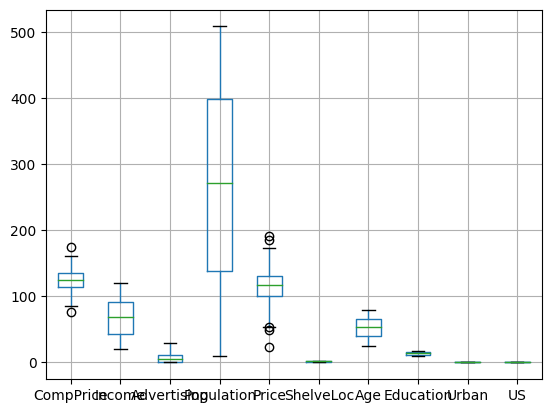

In [8]:
# create a box plot of all features
X.boxplot()

# show the plot
plt.show()

In [10]:
#Replacing outliers with median
import numpy as np
for column in X:
    Q1 = np.percentile(X[column], 25)
    Q3 = np.percentile(X[column], 75)
    IQR = Q3 - Q1
    UW = Q3 + (1.5 * IQR)
    LW = Q1 - (1.5 * IQR)
    X[column].copy()[X[column] > UW] = X[column].median()
    X[column].copy()[X[column] < LW] = X[column].median()


In [11]:
# step5: Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state = 67)

In [12]:

from sklearn.tree import DecisionTreeClassifier
dtcls = DecisionTreeClassifier(criterion = "gini", max_depth = 12)
dtcls.fit(X_train,Y_train)
Y_Pred_train = dtcls.predict(X_train)
Y_Pred_test = dtcls.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac_train = accuracy_score(Y_train,Y_Pred_train)
print("accuracy Score train = ", ac_train.round(3))
ac_test = accuracy_score(Y_test,Y_Pred_test)
print("accuracy Score test= ", ac_test.round(3))


accuracy Score train =  1.0
accuracy Score test=  0.383


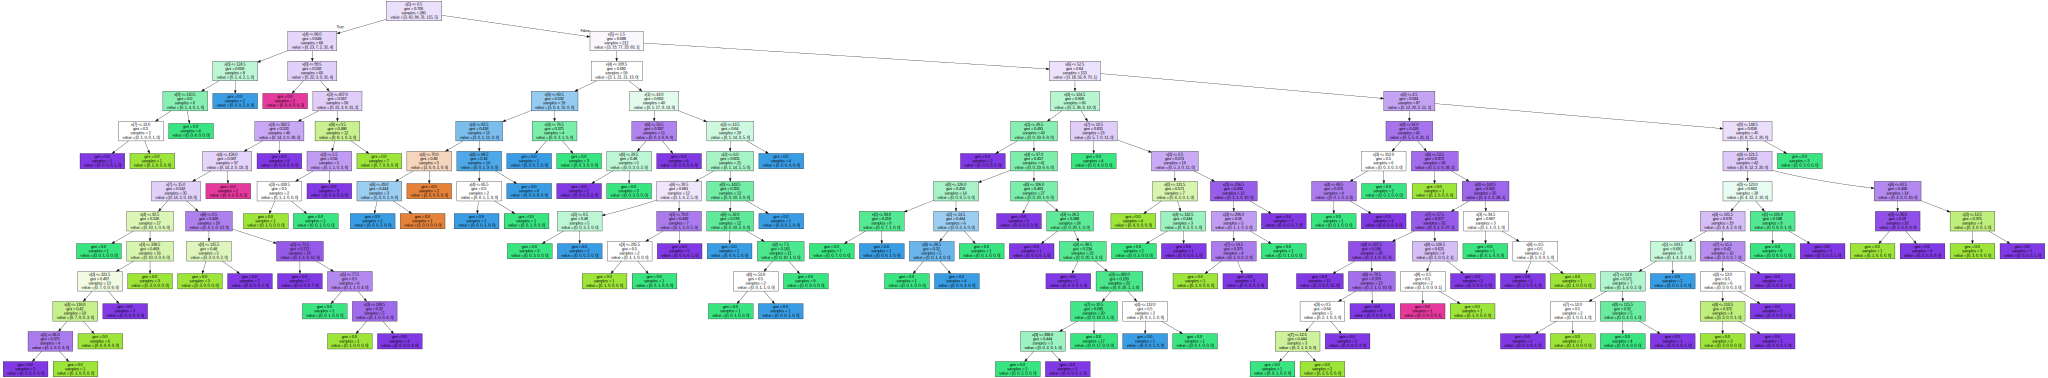

In [14]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtcls, filled = True)
graph = graphviz.Source(dot_data)
graph